# Decision Tree Classification

**Decision Tree** classification is part of the **CART** concept as mentioned in the *Decision Tree Regression* notebook. As a result, it follows the exact same idea as **Decision Tree Regresion**, where the datapoints are split into *terminal leaves*. With **Decision Tree Classification** though, splits provide more *information* when they effectively separate datapoints into their respective classifications. 

<img src="decisionTree.png" width="600px" alt="Splitting datapoints into groups of information."/>

Each *terminal leaf* is then assigned an overall classification, which is determined by the majority classification present in each *leaf*.

<img src="decisionTreeChoices.png" width="600px" alt="Decision tree."/>

*Decision Tree* classification is very similar to *Decision Tree* regression in regards to how the algorithm works, including using **Information Entropy** to separate the data. 

<hr>

## Code

__Setting up the Dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Advertisements.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

__Note:__ Decision trees don't use Euclidean distance to classify datasets, so they don't require feature scaling. That said, the resolution *matplotlib* graphs will be determined by the size of the data itself; this means that larger numbers will lead to a higher resolution graph that may take days to process. By using *feature scaling*, *matplotlib* will be able to create a lower resolution graph that takes far less time to compute. Most times, the difference isn't visually noticeable either.

<hr>

__Fitting the Classifier & Making Predictions__

In [2]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

VERTICAL_ALIGNMENT = 1;
np.concatenate((
    y_pred.reshape(len(y_pred), VERTICAL_ALIGNMENT),
    y_test.reshape(len(y_pred), VERTICAL_ALIGNMENT)
    ), VERTICAL_ALIGNMENT)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

<hr>

__Creating the Confusion Matrix:__

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[62  6]
 [ 3 29]]
0.91


<hr>

__Visualizing Training Results:__

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


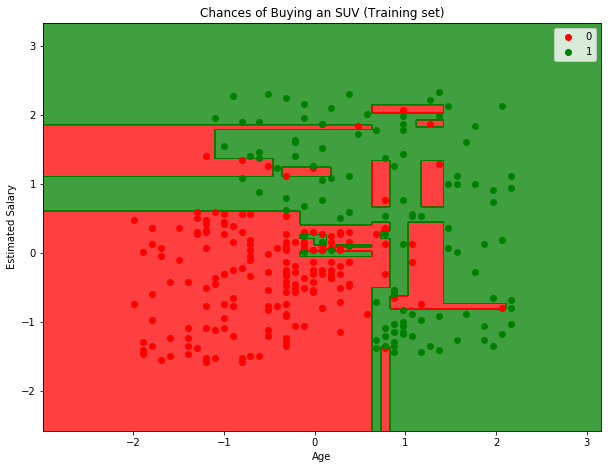

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


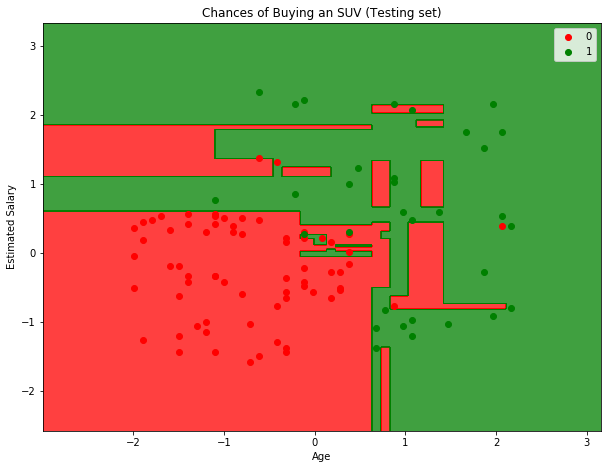

In [5]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

#Classification Visualizer function:
def display(X_set, y_set, type):
    from matplotlib.colors import ListedColormap
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for index, value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == value, 0], X_set[y_set == value, 1],
                    c = ListedColormap(('red', 'green'))(index), label = value)
        
    plt.title('Chances of Buying an SUV (' + type + ' set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#Displaying the results for the training and test sets.
display(X_train, y_train, 'Training')
display(X_test, y_test, 'Testing')

__Results:__
<br>
The decision tree results demonstrate an example of how data can be overfitted. There are red and green outlier datapoints in the training set that should be misclassified, but the decision tree classification algorithm tries to create terminal leaves for these datapoints. The accuracy demonstrates that the data isn't overfitted in this scenario, but this won't be a long lasting model in terms of how effectively it performs to map the population.